### 회귀 분석(Regression Analysis)
독립 변인이 종속 변인에 미치는 영향을 분석하는 통계 모델, 독립 변인과 종속 변인 간의 관계를 분석하는 통계 모델. 수들이 주어졌을 때, 결과값을 예측하는 것

### Regression inputs and outputs
input: independant vars
output: dependant vars


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-05-17 17:38:09.486895: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-17 17:38:09.510879: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 17:38:09.687726: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-17 17:38:09.690008: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 17:38:10.552502: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

### Anatomy of Neural Networks
Input Layer => Hidden Layer(s) => Output Layer

### Architecture of a Regression Model

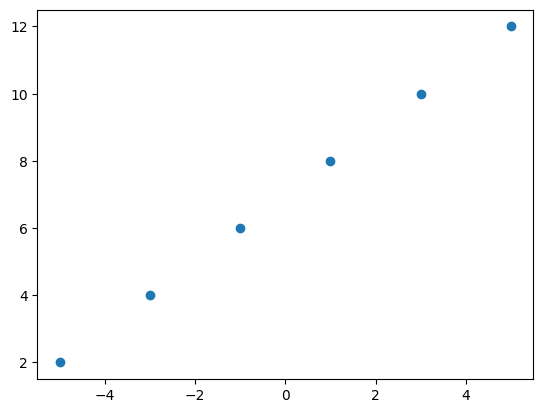

In [2]:
# Create features
X = np.array([-5.,-3.,-1.,1.,3.,5.])
X

# Create labels
y = np.array([2.0, 4.0, 6.0, 8.0, 10.0, 12.0])

plt.scatter(X, y)

In [3]:
y == X + 7

array([ True,  True,  True,  True,  True,  True])

### Input and Output shapes

In [4]:
X = tf.constant(X)
y = tf.constant(y)

X = tf.reshape(X, (6,1))
y = tf.reshape(y, (6,1))

X = tf.cast(X, dtype=tf.float32)
y = tf.cast(y, dtype=tf.float32)

X, y

(<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
 array([[-5.],
        [-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]], dtype=float32)>,
 <tf.Tensor: shape=(6, 1), dtype=float32, numpy=
 array([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.],
        [12.]], dtype=float32)>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([1]), TensorShape([1]))

### Steps in Modelling with TensorFlow

1. **Creating a model** = define the input and output layer, as well as the hidden layers of a deep learning model.
2. **Compiling a model** = define the loss function (in other words, the function which tell our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning ) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough

In [6]:
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # MAE is mean absolue error
             optimizer=tf.keras.optimizers.SGD(), # "sgd", SGD is Stochastic Gradient Descent
             metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=5)


Epoch 1/5
1/1 [==============================] - 0s 226ms/step - loss: 7.0000 - mae: 7.0000
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 6.9900 - mae: 6.9900
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 6.9800 - mae: 6.9800
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 6.9700 - mae: 6.9700
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 6.9600 - mae: 6.9600


### What is Keras?
**Keras** is a high-level, deep learning API developed by Google for implementing neural networks. It is written in Python and is used to make the implementation of neural networks easy. Keras is extremely beginner-friendly, but this feature makes Kears slower than oter deep learning.


In [7]:
y_pred = model.predict([7.])
y_pred

1/1 [==============================] - 0s 55ms/step


array([[1.179949]], dtype=float32)

### Imporving your model

모델 개선은 모델 생성 과정에서도 진행할 수 있다.

1. **Creating a model** - 뉴런(hidden unit) 수 늘리기
2. **Compiling a moel** - 최적화 함수를 수정, 변경하거나 학습률(learning rate)를 변경한다.
3. **Fitting a model** - 이포크(Epoch) 횟수를 늘리거나, 모델의 데이터량을 늘린다.

In [8]:
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,  # MAE is mean absolute error
             optimizer=tf.keras.optimizers.SGD(), # "sgd", SGD is Stochastic Gradient Descent
             metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 151ms/step - loss: 8.2614 - mae: 8.2614
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 8.2291 - mae: 8.2291
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 8.1969 - mae: 8.1969
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 8.1647 - mae: 8.1647
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 8.1325 - mae: 8.1325
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 8.1003 - mae: 8.1003
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 8.0680 - mae: 8.0680
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 8.0358 - mae: 8.0358
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 8.0036 - mae: 8.0036
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.9714 - mae: 7.9714
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 7.939

In [9]:
# Remind our data
X,y

(<tf.Tensor: shape=(6, 1), dtype=float32, numpy=
 array([[-5.],
        [-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]], dtype=float32)>,
 <tf.Tensor: shape=(6, 1), dtype=float32, numpy=
 array([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.],
        [12.]], dtype=float32)>)

In [10]:
model.predict([7.0, 9.0])

1/1 [==============================] - 0s 38ms/step


array([[-0.7510833],
       [-1.1980593]], dtype=float32)

In [11]:
# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(lr=0.01),
             metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 267ms/step - loss: 7.0000 - mae: 7.0000
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9869 - mae: 6.9869
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9736 - mae: 6.9736
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9602 - mae: 6.9602
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9465 - mae: 6.9465
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9327 - mae: 6.9327
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 6.9187 - mae: 6.9187
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 6.9044 - mae: 6.9044
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 6.8900 - mae: 6.8900
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 6.8753 - mae: 6.8753
Epoch 11/100
1/1 [==============================] - 0s 4ms/step - loss: 6.860

In [12]:
# Predict
model.predict([7.0, 9.0, 11.0])

1/1 [==============================] - 0s 47ms/step


array([[4.4709873],
       [4.8916087],
       [5.312231 ]], dtype=float32)

In [13]:
X = tf.constant(np.array([-5, -3, -1, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]), dtype=tf.float32)
y = tf.constant(np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]), dtype=tf.float32)

X = tf.reshape(X, (-1, 1))
y = tf.reshape(y, (-1,1))

X, y

(<tf.Tensor: shape=(15, 1), dtype=float32, numpy=
 array([[-5.],
        [-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.],
        [13.],
        [15.],
        [17.],
        [19.],
        [21.],
        [23.]], dtype=float32)>,
 <tf.Tensor: shape=(15, 1), dtype=float32, numpy=
 array([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.],
        [12.],
        [14.],
        [16.],
        [18.],
        [20.],
        [22.],
        [24.],
        [26.],
        [28.],
        [30.]], dtype=float32)>)

In [14]:
# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

# 3. Fit the model
model.fit(X, y, epochs=100, verbose=0)

In [15]:
# Predict
model.predict([25])

1/1 [==============================] - 0s 43ms/step


array([[32.71799]], dtype=float32)

# Evaluating a model
: 모델의 예측이 정확한지, 모델이 input과 output 간의 패턴을 얼마나 정확하게 분석하는지


`Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> ...`

> "Visualize, visualize, visualize, ..."


In [16]:
X = tf.constant(tf.range(-100., 100., 4.), dtype=tf.float32)
y = tf.constant(tf.range(-400., 400., 16.), dtype=tf.float32)

# X = tf.reshape(X, (-1,1))
# y = tf.reshape(y, (-1,1))

X, y

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
          80.,   84.,   88.,   92.,   96.], dtype=float32)>,
 <tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([-400., -384., -368., -352., -336., -320., -304., -288., -272.,
        -256., -240., -224., -208., -192., -176., -160., -144., -128.,
        -112.,  -96.,  -80.,  -64.,  -48.,  -32.,  -16.,    0.,   16.,
          32.,   48.,   64.,   80.,   96.,  112.,  128.,  144.,  160.,
         176.,  192.,  208.,  224.,  240.,  256.,  272.,  288.,  304.,
         320.,  336.,  352.,  368.,  384.], dtype=float32)>)

In [17]:
y == X*4

<tf.Tensor: shape=(50,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])>

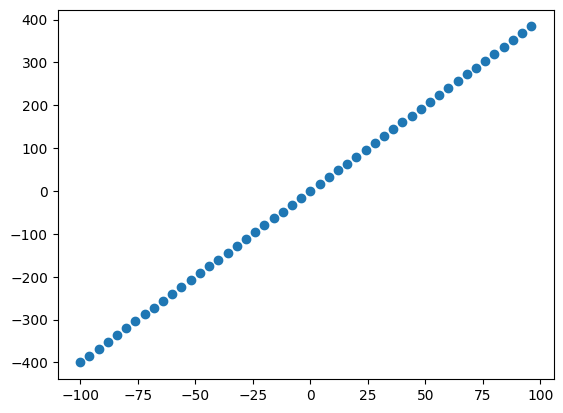

In [18]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...


* **Training set** - 모델이 학습할 데이터 세트. 전체 데이터의 70-80%
* **Validation set** - 모델의 정확도를 조율하는 데이터 세트. 전체 데이터의 10-15%
* **Test set** - 모델의 정확도를 평가하기 위한 데이터 세트. 전체 데이터의 10-15%

### Goal : Generalization
이 데이터 세트들은 모델이 처음 보는 데이터에 대해서도 기대하는 값을 얻도록 훈련시키는 데 필요하다.

In [19]:
# 데이터 세트 분리
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

X_train

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
        -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
        -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
          8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
         44.,   48.,   52.,   56.], dtype=float32)>

### Visualizing the data

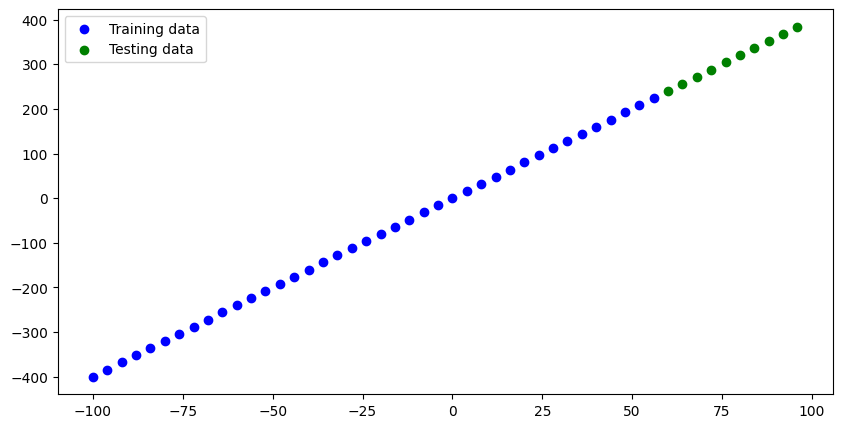

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()

In [21]:
# 1. Creating the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compilng the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [22]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [40]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, input_shape=(1,), name="input_layer")) # input_shape을 지정하지 않으면, 실제 데이터가 입력되기 전까지 모델은 weights를 갖지 않는다.
model.add(tf.keras.layers.Dense(1, name="output_layer"))  # 처음에 input_shape을 지정하면 그 다음부터는 tf가 추론한다.

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


### What is weights, bias and params?

**weights** -
**bias** -
**params** -


https://www.baeldung.com/cs/neural-networks-bias


In [41]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 175.7189 - mae: 175.7189
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 154.6259 - mae: 154.6259
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 134.4527 - mae: 134.4527
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 113.6484 - mae: 113.6484
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 92.3573 - mae: 92.3573
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 69.4202 - mae: 69.4202
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 44.2179 - mae: 44.2179
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 15.3522 - mae: 15.3522
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 13.2937 - mae: 13.2937
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 29.5775 - mae: 29.5775
Epoch 11/100
2/2 [==============================] -

In [25]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 모델의 예측치를 시각화하기

예측치를 시각화할 때, ground truth label을 사용해서 그래프를 구성하는 것이 좋다. 다른 사람들의 작업 결과물을 그래프로 확인해보면, 보통 `y_test` 또는 `y_true` versus `y_pred` 꼴로 라벨링 된 것을 확인할 수 있다.
* label - 정확한 수치
* ground truth - 모델이 예측하기를 바라는 값

In [42]:
# 
y_pred = model.predict(X_test)
y_pred, y_test

1/1 [==============================] - 0s 31ms/step


(array([[237.99643],
        [253.87273],
        [269.749  ],
        [285.62524],
        [301.50162],
        [317.37787],
        [333.25412],
        [349.1304 ],
        [365.0067 ],
        [380.883  ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([240., 256., 272., 288., 304., 320., 336., 352., 368., 384.],
       dtype=float32)>)

🔑 **Note**: 반복해서 사용하는 기능이 있다면, 함수화하는 것이 좋다.

In [43]:
# 플롯 함수를 만들어보자
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
    """
    훈련 데이터, 테스트 데이터를 그래프화하고, 예측치와 비교해볼 수 있다.
    """
    
    plt.figure(figsize=(16,10))
    plt.scatter(train_data, train_labels, c="b", label="Training data" )
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend();

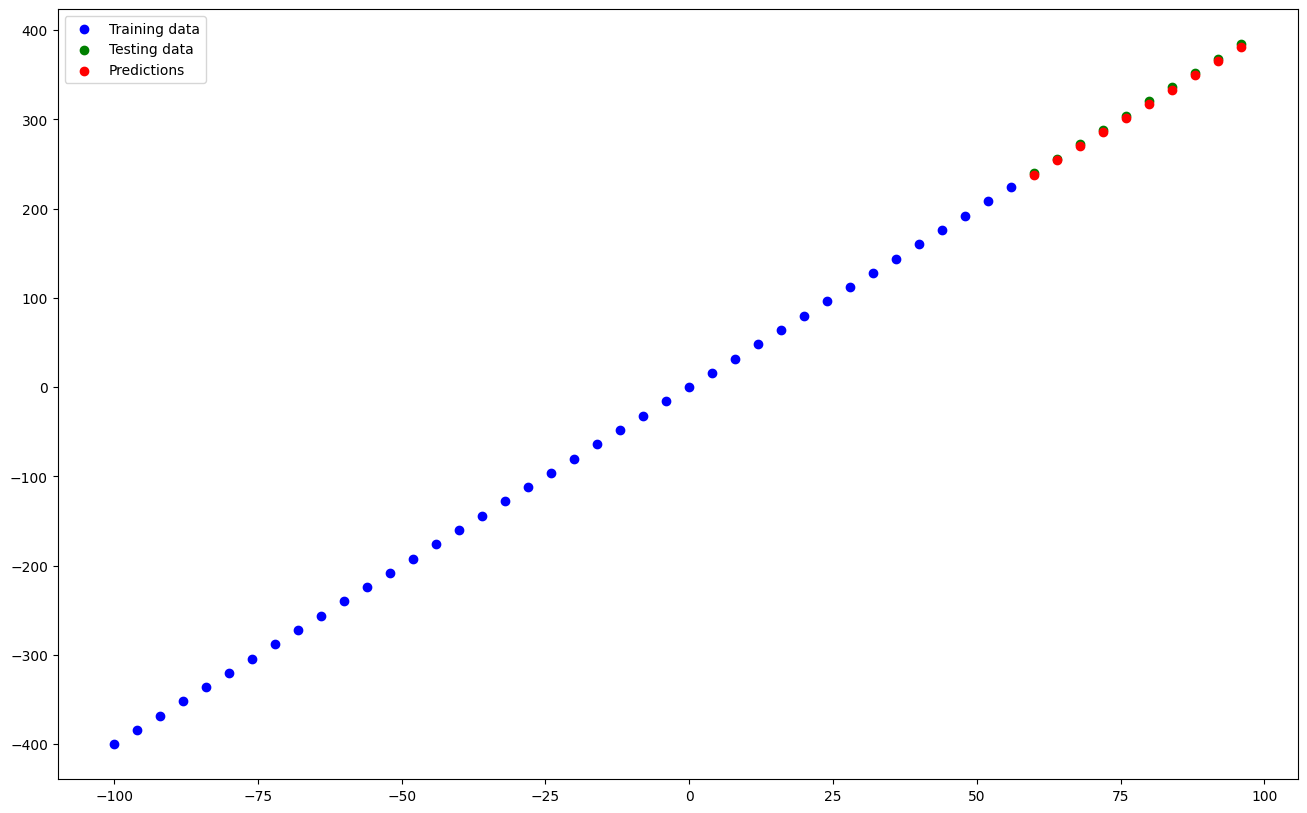

In [44]:
plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred)

### Regression Evaluation Metrics로 모델의 예측치 평가하기

문제마다 모델을 평가할 때 사용하는 evaulation metric의 종류가 다르다. Regression 문제에서는 주로 두 개의 metrics를 사용한다.
* MAE - mean absolute error, 각 예측치의 편차를 평균 낸 것
* MSE - mean square error, 각 예측치의 편차를 제곱하여 평균 낸 것. 제곱하여 오류 값이 커지는 것을 이용한다.
* huber - combination of MAE and MSE

In [45]:
# 테스트 데이터로 모델 평가하기
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 60ms/step - loss: 2.5603 - mae: 2.5603


[2.560288906097412, 2.560288906097412]

In [46]:
y_pred = tf.squeeze(y_pred)
y_test, y_pred

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([240., 256., 272., 288., 304., 320., 336., 352., 368., 384.],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([237.99643, 253.87273, 269.749  , 285.62524, 301.50162, 317.37787,
        333.25412, 349.1304 , 365.0067 , 380.883  ], dtype=float32)>)

In [47]:
y_test - y_pred

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2.0035706, 2.1272736, 2.251007 , 2.3747559, 2.4983826, 2.6221313,
       2.7458801, 2.8695984, 2.9932861, 3.1170044], dtype=float32)>

In [48]:
# MAE 계산하기
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.560289>

In [49]:
# MSE  계산하기
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse # 편차를 제곱하므로 일반적으로 MAE보다 값이 크다.

<tf.Tensor: shape=(), dtype=float32, numpy=6.6813507>

In [75]:
# MAE, MSE 함수 만들기
def my_mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=tf.squeeze(y_true),
                                          y_pred=tf.squeeze(y_pred))

def my_mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=tf.squeeze(y_true),
                                          y_pred=tf.squeeze(y_pred))

# 모델 개선하기

`Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> ...`

1. 더 많은 데이터를 학습시키기
2. 모델을 더 복잡하게 설계하기 ( 더 많은 레이어, 더 많은 노드)
3. 더 오래 학습시키기

# 3가지 모델링 실험

1. model_1 - 1 layer, 100 epochs
2. model_2 - 2 layers, 200 epochs
3. model_3 - 2 layers, 500 epochs

In [60]:
x_train = X_train
x_test = X_test

x_train = tf.reshape(x_train, shape=(-1, 1))
y_train = tf.reshape(y_train, shape=(-1, 1))
x_test = tf.reshape(x_test, shape=(-1, 1))
y_test = tf.reshape(y_test, shape=(-1, 1))

x_train.shape, y_train.shape, x_test.shape, y_test.shape

(TensorShape([40, 1]),
 TensorShape([40, 1]),
 TensorShape([10, 1]),
 TensorShape([10, 1]))

### `model_1` 

In [65]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1))

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
                metrics=["mae"])

model_1.fit(x_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 219.4959 - mae: 219.4959
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 215.8976 - mae: 215.8976
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 212.0854 - mae: 212.0854
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 208.3970 - mae: 208.3970
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 204.7301 - mae: 204.7301
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 201.2561 - mae: 201.2561
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 197.7968 - mae: 197.7968
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 194.0839 - mae: 194.0839
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 189.8435 - mae: 189.8435
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 186.0568 - mae: 186.0568
Epoch 11/100
2/2 [=====================

1/1 [==============================] - 0s 15ms/step


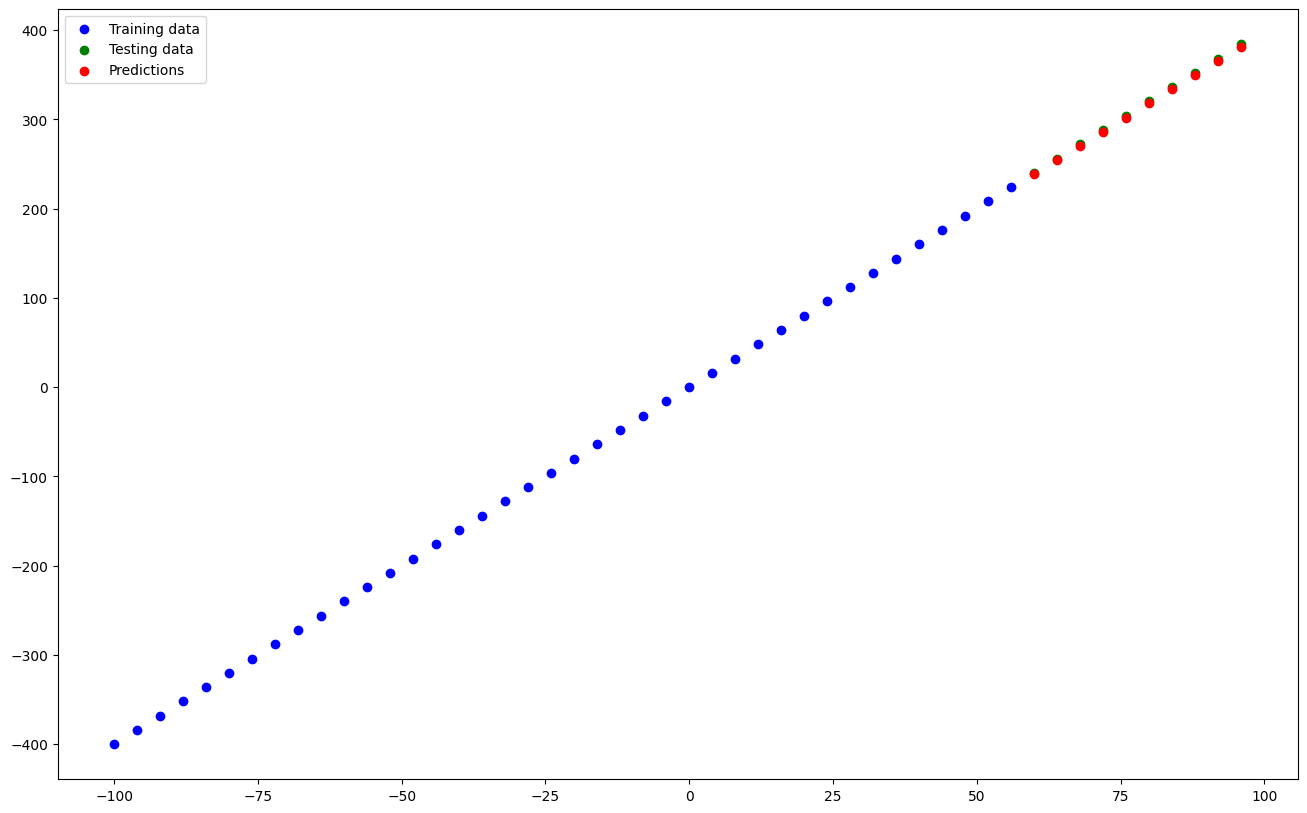

In [69]:
# Plot
y_preds_1 = model_1.predict(x_test)
plot_predictions(predictions=y_pred_1)

In [76]:
#  Evaluation
mae_1 = my_mae(y_test, y_preds_1)
mse_1 = my_mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=2.214885>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.009221>)

### `model_2`
2 dense layer, 100 epochs

In [110]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(40))
model_2.add(tf.keras.layers.Dense(1))

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

model_2.fit(x_train, y_train, epochs=100)

model_2.summary()

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 152.9535 - mae: 152.9535
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 30.0399 - mae: 30.0399
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 63.2091 - mae: 63.2091
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 21.0094 - mae: 21.0094
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 23.1202 - mae: 23.1202
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 23.6748 - mae: 23.6748
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1881 - mae: 11.1881
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 28.2175 - mae: 28.2175
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 8.0032 - mae: 8.0032
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 41.8881 - mae: 41.8881
Epoch 11/100
2/2 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 33ms/step


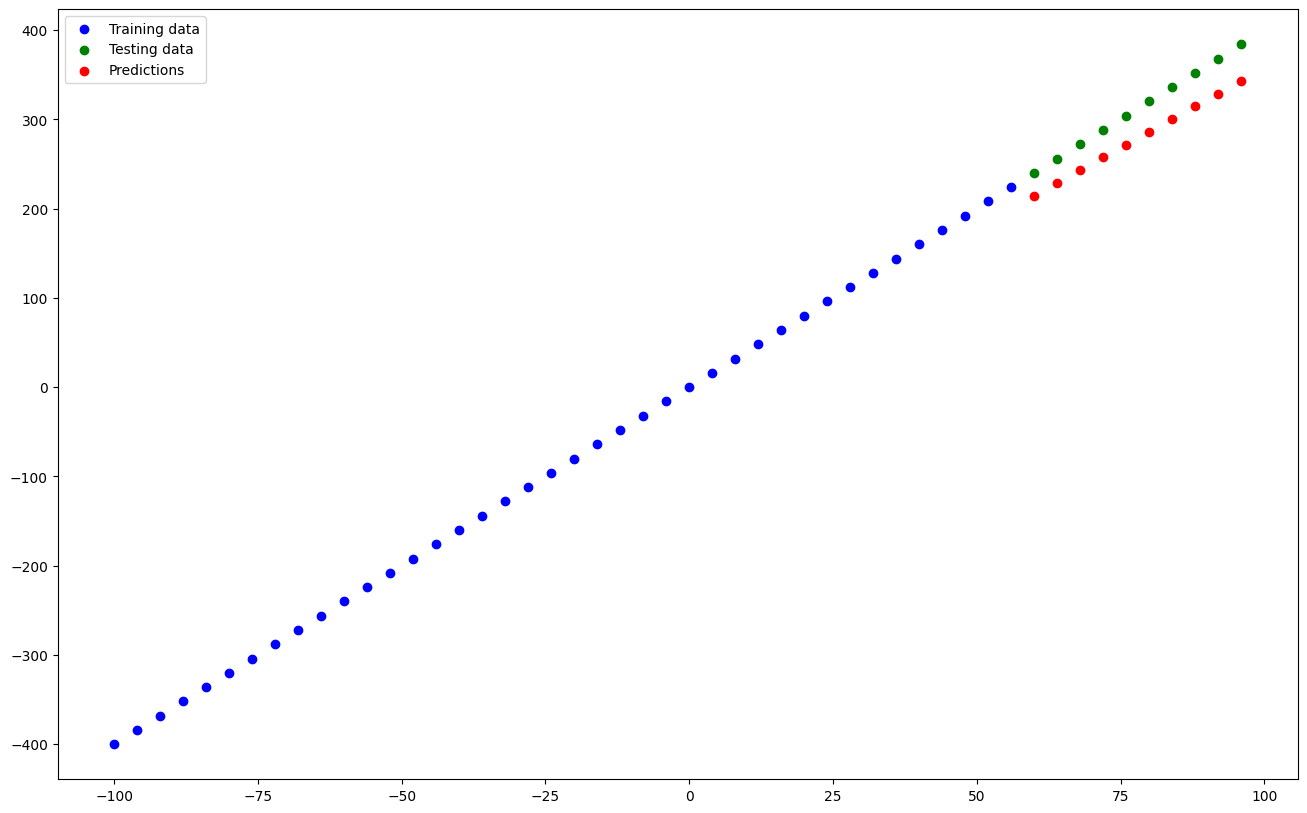

In [111]:
y_preds_2 = model_2.predict(x_test)
plot_predictions(predictions=y_preds_2)

In [112]:
mae_2 = my_mae(y_true=y_test, y_pred=y_preds_2)
mse_2 = my_mse(y_true=y_test, y_pred=y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=33.227074>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1128.5876>)

### `model_3`
2 dense layer, 500 epochs

In [113]:
x_train.shape, y_train.shape

(TensorShape([40, 1]), TensorShape([40, 1]))

In [114]:
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(40))
model_3.add(tf.keras.layers.Dense(1))

model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model_3.fit(x_train, y_train, epochs=500)

model_3.summary()

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 165.4497 - mae: 165.4497
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 151.9933 - mae: 151.9933
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 138.7926 - mae: 138.7926
Epoch 4/500
2/2 [==============================] - 0s 3ms/step - loss: 125.1245 - mae: 125.1245
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 111.3492 - mae: 111.3492
Epoch 6/500
2/2 [==============================] - 0s 3ms/step - loss: 96.9650 - mae: 96.9650
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 81.7971 - mae: 81.7971
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 65.1655 - mae: 65.1655
Epoch 9/500
2/2 [==============================] - 0s 4ms/step - loss: 48.8137 - mae: 48.8137
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 31.2212 - mae: 31.2212
Epoch 11/500
2/2 [==============================]

1/1 [==============================] - 0s 16ms/step


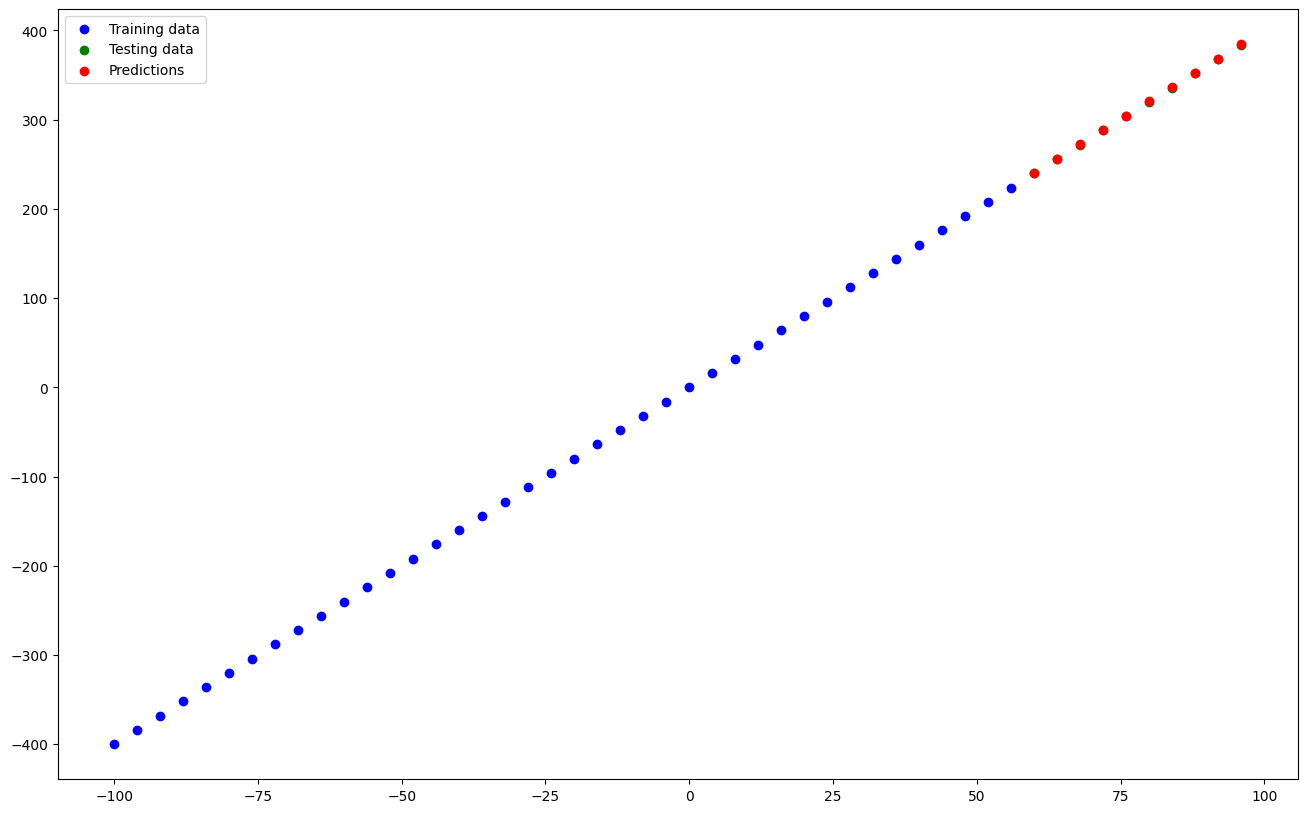

In [92]:
y_preds_3 = model.predict(x_test)
plot_predictions(predictions=y_preds_3)

In [98]:
mae_3 = my_mae(y_true=y_test,
              y_pred=y_preds_3)

mse_3 = my_mse(y_true=y_test,
              y_pred=y_preds_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.43923187>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.1967158>)

# 실험 결과 비교하기

In [115]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3",mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,2.214885,5.009221
1,model_2,33.227074,1128.587646
2,model_3,0.439232,0.196716


> 🔑 **Note**: 실험 간에 소요되는 시간을 최소화할 필요가 있다. 또한, 많은 실험을 해볼 수록, 무엇이 통하는지, 무엇이 통하지 않는지를 이해할 수 있다.

# 모델 트래킹


1. Tensorboard
2. Weights & Biases

# 모델 저장하기


https://www.tensorflow.org/tutorials/keras/save_and_load?hl=ko

모델 저장 시에 사용되는 두 개의 주된 포맷
1. The SavedModel Format
2. The HDF5 Format - For Large Model

In [123]:
# The SavedModel Format으로 모델 저장하기
model_3.save("models/best_model_by_SavedModel")

INFO:tensorflow:Assets written to: models/best_model_by_SavedModel/assets


INFO:tensorflow:Assets written to: models/best_model_by_SavedModel/assets


In [124]:
# The HDF5 Format으로 모델 저장하기
model_3.save("models/best_model_by_HDF5.h5")

# 모델 로드하기

In [121]:
from tensorflow.keras.models import load_model

In [125]:
# Load SavedModel
SavedModel = load_model("models/best_model_by_SavedModel")
SavedModel.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 40)                80        
                                                                 
 dense_24 (Dense)            (None, 1)                 41        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [136]:
model_3_preds = model_3.predict(x_test)
SavedModel_preds = SavedModel.predict(x_test)
model_3_preds == SavedModel_preds

1/1 [==============================] - 0s 42ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [137]:
# Load HDF5
HDF5 = load_model("models/best_model_by_HDF5.h5")
HDF5.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 40)                80        
                                                                 
 dense_24 (Dense)            (None, 1)                 41        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [139]:
HDF5_preds = HDF5.predict(x_test)
model_3_preds == HDF5_preds

1/1 [==============================] - 0s 21ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Download a model (or any other file) from Google Colab

1.  파일 탭에서 오른쪽 클릭하고 다운로드 버튼을 누른다.
2.  구글의 colab 모듈로 다운로드 받는다.
```python
from google.colab import files

files.download("MODEL_PATH")
```
3.  노트북과 구글 드라이브를 연결하여 다운로드 받는다.
`!cp FILE_FATH DIR_PATH`

# A Larger Example

In [1]:
import os
os.environ["KAGGLE_USERNAME"]="gyeongsugim"
os.environ["KAGGLE_KEY"]="13ef87a9410279c26d00c6ec2999b870"

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import tensorflow as tf

In [143]:
!kaggle datasets download -d mirichoi0218/insurance

  0%|                                               | 0.00/16.0k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 16.0k/16.0k [00:00<00:00, 2.77MB/s]


In [144]:
!unzip kaggle_data/insurance.zip

Archive:  kaggle_data/insurance.zip
  inflating: insurance.csv           


In [61]:
df = pd.read_csv("kaggle_data/insurance.csv")
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
df.isnull().sum()
df.dropna().head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


# One-hot Encoding

숫자가 아닌 데이터 세트를 숫자 데이터 세트로나타내는 방법 중 하나이다. One-hot Encoding은 어떤 카테고리의 단어 집합이 주어졌을 때, 해당 단어 집합의 크기와 같은 숫자 데이터 세트를 생성하고, 각 단어별로 인덱스를 할당하고, 해당 인덱스 1을 부여한다.

In [7]:
df = pd.get_dummies(df, columns=["sex", "smoker", "region"], dtype=np.int32)
df.head(3)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,1,0,0,1,0,0,0,1
1,18,33.77,1,1725.5523,0,1,1,0,0,0,1,0
2,28,33.00,3,4449.4620,0,1,1,0,0,0,1,0


In [63]:
from sklearn.model_selection import train_test_split

x_data = df.drop(columns=["charges"])
y_data = df[["charges"]]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1204, 6), (1204, 1), (134, 6), (134, 1))

# 모델 개선하기

In [64]:
tf.random.set_seed(42)

model = Sequential()
model.add(Dense(121)) # 데이터 크기에 비해 모델의 복잡도가 낮아 학습시킬 수가 없을 때가 있다. 그럴 때는 compile을 수정해볼 것!
model.add(Dense(11))
model.add(Dense(1))

model.compile(loss="mae", optimizer=Adam(learning_rate=0.01), metrics=["mae"]) # SGD => Adam

history = model.fit(x_train, y_train, epochs=300)

model.summary()

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [22]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 3398.0859 - mae: 3398.0859


[3398.0859375, 3398.0859375]

In [23]:
y_train.median(), y_train.mean()

(charges    9447.316375
 dtype: float64,
 charges    13321.096786
 dtype: float64)

Text(0, 0.5, 'loss')

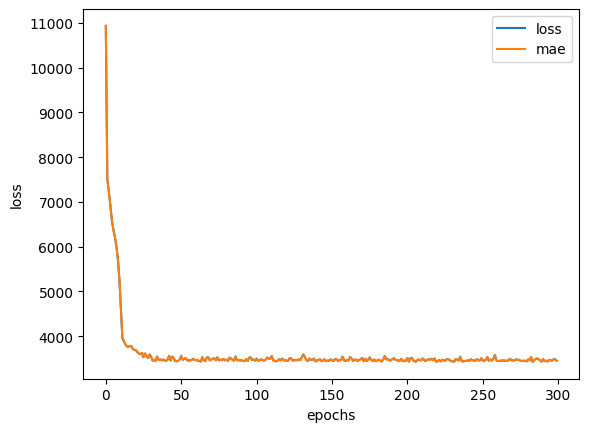

In [26]:
import matplotlib.pyplot as plt

# Plot history (loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

🤔 **질문**: 얼마나 학습시켜야 하나?

때에 따라 다르다... 하지만 텐서 플로우가 해법을 제시한다. 

*Early Stopping*


https://keras.io/api/callbacks/early_stopping/

# 전처리 (Normalization and Standardization)

* Normalization - Normalization의 목표는 숫자 데이터 세트의 데이터별 분포를 흐트리지 않으면서도, 스케일을 줄이는 것(0과 1 사이)이다.
* Standardization - 정규 분포에 가깝게 데이터를 변환한다.

어떤 것을 사용해야 할지 모를 때는, 둘 다 사용하여 비교해본다.

In [65]:
df = pd.read_csv("kaggle_data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [66]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #  turn all values in this column between 0 and 1
    (OneHotEncoder(handle_unknown="ignore", dtype="int"), ["sex", "smoker", "region"])
)

# Create x & y
x_data = df.drop("charges", axis=1)
y_data = df[["charges"]]

# Build our data sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

# What does our data look like now?

In [67]:
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [68]:
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [69]:
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

# Build a NN model to fir on our nomarlized data

In [74]:
tf.random.set_seed(42)

insurance_model = Sequential()
insurance_model.add(Dense(121))
insurance_model.add(Dense(11))
insurance_model.add(Dense(1))

insurance_model.compile(loss="mae", optimizer=Adam(0.001), metrics=["mae"])

history = insurance_model.fit(x_train_normal, y_train, epochs=200)

insurance_model.summary()

Epoch 1/200
34/34 [==============================] - 0s 1ms/step - loss: 13343.2676 - mae: 13343.2676
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13332.5381 - mae: 13332.5381
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 13304.2822 - mae: 13304.2822
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13244.4678 - mae: 13244.4678
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 13138.7393 - mae: 13138.7393
Epoch 6/200
34/34 [==============================] - 0s 972us/step - loss: 12972.5977 - mae: 12972.5977
Epoch 7/200
34/34 [==============================] - 0s 972us/step - loss: 12732.3945 - mae: 12732.3945
Epoch 8/200
34/34 [==============================] - 0s 948us/step - loss: 12404.6914 - mae: 12404.6914
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 11978.5986 - mae: 11978.5986
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 11

In [72]:
# Evaluate our model
insurance_model.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3410.2080 - mae: 3410.2080


[3410.2080078125, 3410.2080078125]

# With StandardScaler()

In [77]:
from sklearn.preprocessing import StandardScaler

# Create a column transformer
ct = make_column_transformer(
    (StandardScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore", dtype="int"), ["sex", "smoker", "region"])
)

# Create x & y
x_data = df.drop("charges", axis=1)
y_data = df[["charges"]]

# Build our data sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(x_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [78]:
tf.random.set_seed(42)

insurance_model2 = Sequential()
insurance_model2.add(Dense(121))
insurance_model2.add(Dense(11))
insurance_model2.add(Dense(1))

insurance_model2.compile(loss="mae", optimizer=Adam(0.001), metrics=["mae"])

history = insurance_model2.fit(x_train_normal, y_train, epochs=200)

insurance_model2.summary()

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13343.1055 - mae: 13343.1055
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13332.3799 - mae: 13332.3799
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13304.8496 - mae: 13304.8496
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13248.1992 - mae: 13248.1992
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 13150.7178 - mae: 13150.7178
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 13001.6797 - mae: 13001.6797
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12790.6514 - mae: 12790.6514
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 12507.6807 - mae: 12507.6807
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 12145.6221 - mae: 12145.6221
Epoch 10/200
34/34 [==============================] - 0s 1ms/step - loss: 11715.24

In [79]:
insurance_model2.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3161.5134 - mae: 3161.5134


[3161.513427734375, 3161.513427734375]